# Лабораторная работа №1
Выполнила студентка гр. 9382 Сорочина Мария, вариант 17.
## Цель работы.
Изучить возможности библиотек Python для решения задач цифровой обработки сигналов.
## Задачи лабораторной работы
1. Освоить Jupiter Notebook
2. Выполнить загрузку аудио сигнала и построить огибающую (график).
3. Фильтрация (выбрать один из 4 основных типов фильтров). Получить фильтрованный сигнал.
4. Детектор сигнал/шум. Получить сигнал после детектирования
5. Эффект ”Эхо”. Получить сигнал после работы аудио-эффекта.
6. Бонусное задание: эффект ”Distortion”(классический вариант). Получить сигнал после работы аудио-эффекта.

## 2. Загрузка аудио сигнала и построение огибающей.
Имеется сигнал x(i), i = 0,1, . . . ,N − 1. Хотим построить огибающую y(j), j = 0,1, . . . ,n − 1.
Пусть m = $\left[\frac{N}{n}\right]$— число точек в интервале усреднения. Тогда
$y(j) = \frac{1}{m}\sum\limits_{k=mj}^{mj+m-1}|x(k)|$


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  
No handles with labels found to put in legend.


177778


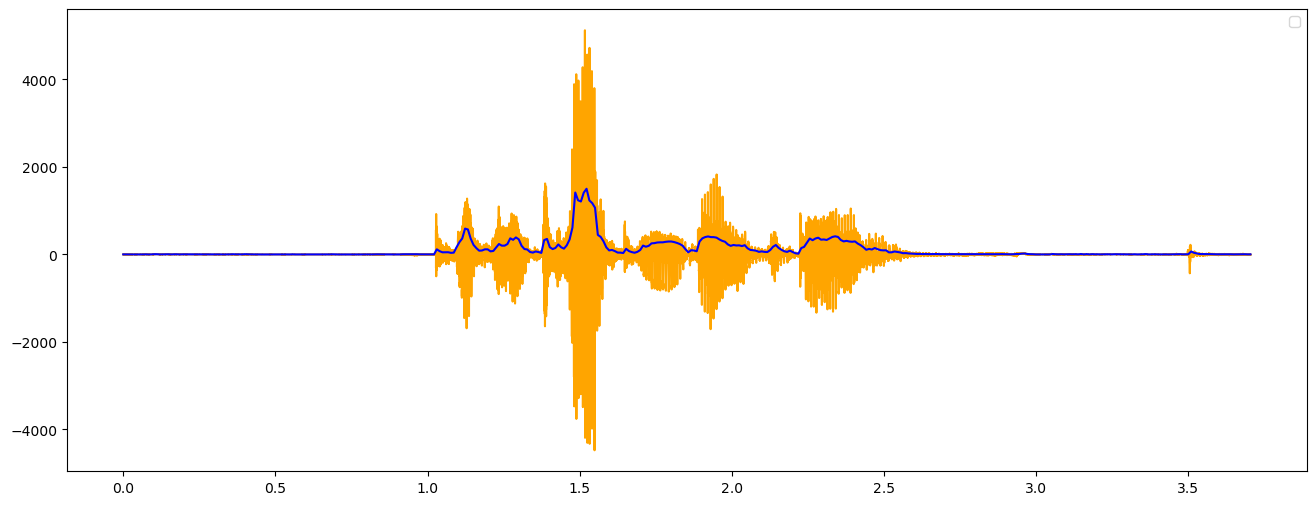

In [17]:
import sys
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

sampleRate, data = wavfile.read('03-01-05-01-01-02-17_A17.wav')
n = 400
length = data.shape[0] / sampleRate
time = np.linspace(0., length, data.shape[0])
time2 = np.linspace(0, length, n)
m = round(data.shape[0]/n)
x = []
y = []
for j in range(0,n):
    sum = 0
    for k in range(m*j,m*j+m):
        sum+=abs(data[k])
    sum = sum / m
    x.append(j*m)
    y.append(sum)
    
print(len(data))


fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(6)
plt.legend()
plt.plot(time, data, color='orange')
plt.plot(time2, y, color="blue")
plt.show()

## 3.Фильтрация сигнала


No handles with labels found to put in legend.


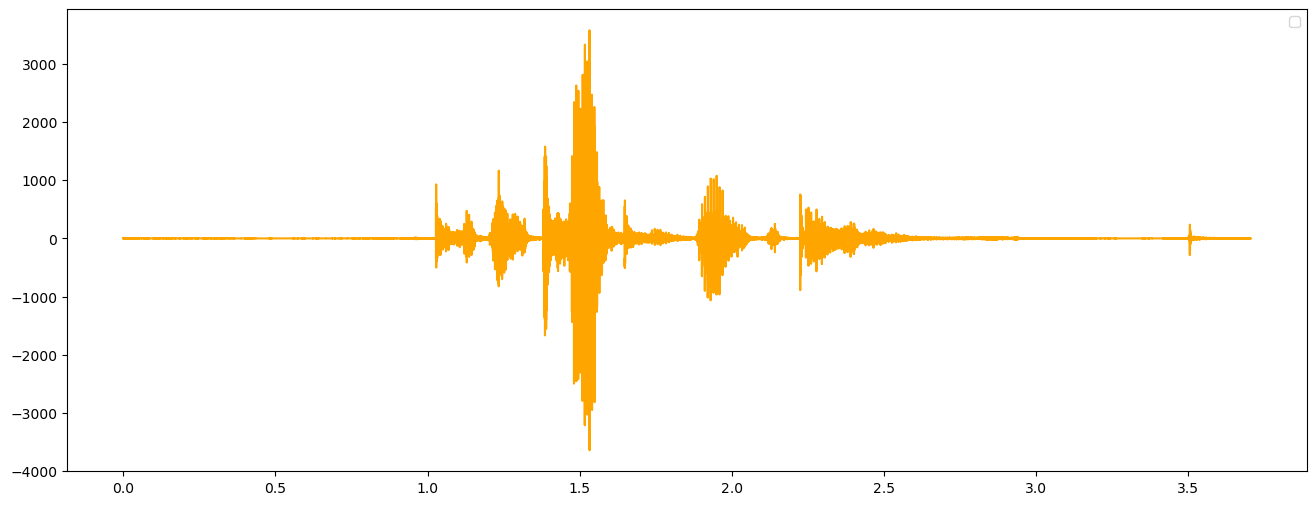

In [18]:
from scipy import signal
 
b, a = signal.butter(8, 1500/sampleRate, 'highpass')   # Конфигурационный фильтр 8 указывает порядок фильтра
filtedData = signal.filtfilt(b, a, data)  # данные - это сигнал, который нужно отфильтровать

wavfile.write("num3.wav",sampleRate, filtedData.astype(np.int16))

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(6)
plt.plot(time, filtedData, color = "orange")
plt.legend()
plt.show()

## 4. Детектор сигнал/шум
Определяем среднее сигнала по амплитуде (без учета знака):
$mid = \frac{1}{N}\sum\limits_{k=0}^{N-1}|x(k)|$  
Определяем порог детектора — $T h = \alpha ∗ mid$, где $0 < \alpha < 1$ подбирается экспериментально.
Задаем величину ”провала”(в отсчетах) — k. Обозначим y(i) — сигнал после
детектирования.  
**• Событие ”начало сигнала”.** Если x(i) в течении k отсчетов превышает порог, y(i) = x(i).  
**• Событие ”окончание сигнала”.** Если x(i) в течении k отсчетов меньше порога, y(i) = 0.



400


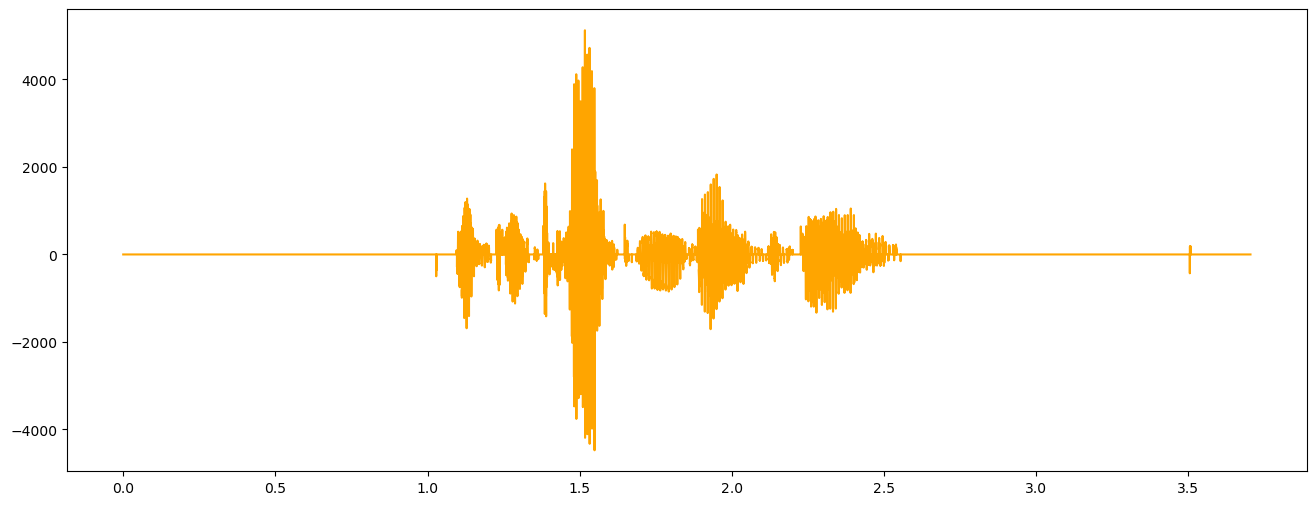

In [19]:
sum = 0
for k in range(data.shape[0]):
    sum += abs(data[k])    
mid = sum / data.shape[0]

Th = 0.9 * mid
k = 10

more = 0
less = 0
y1 = []
print(len(y))
for i in range(data.shape[0]):
    y1.append(0)
for i in range(data.shape[0]):
    if abs(data[i]) > Th:
        more += 1
        less = 0
        if more >= k:
            y1[i] = data[i]
    else:
        less += 1
        more = 0

wavfile.write("num4.wav",sampleRate, np.array(y1).astype(np.int16))
        
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(6)
plt.plot(time, y1, color="orange")
plt.show();

## 5. Эффект "Эхо" (простейший ревербатор)
• Ревербератор реализован, как набор линий задержки. Число линий задержки $N_{L} \geq 8$.
Каждая линия задержки имеет свой весовой коэффициент (задается пользователем):

$α_1 > α_2 > · · · > α_{N_L}$
.

• Перед добавлением к исходному сигналу, выход ревербератора фильтруется
ФНЧ-фильтром первого порядка.
• Желаемое соотношение между ”сухим”и обработанным сигналом задается
коэффициентом применимости $γ$.  
• Ревербератор может работать в двух режимах: ручной и с использованием готовой
конфигурации (preset). Для ручного режима регулируется пользователем задается
максимальная задержка D1, а величины остальных определяются автоматически через
нее:

$Di = D_1 2^\frac{1-i}{N_L}, i = 2, . . . ,N_L.$

Для готовой конфигурации пользователь вручную задает последовательность

$D_1 > D_2 > · · · > D_{N_L}$.


In [20]:
import random
from scipy import signal
N_L = 8;
print("Введите 8 весовх коэффициентов через пробел или введите неверное кол-во (любое, кроме 8) чисел для авто заполнения:")
a = input().split();
for i in range(len(a)):
    a[i] = int(a[i])
D = [0 for i in range(N_L)]
if len(a) != 8:
    a.clear()
    D[0] = 10000
    for i in range(8):
        a.append(round(random.random(), 2))
else:
    print("Введите максимальную задержку D1:")
    D[0] = int(input())
a.sort(reverse = True)
for i in range(1,8):
    D[i] = round(D[0]*2**(1-i)/N_L)
print("Весовые коэффициенты:", a)
print("D:", D)
Dxa = [round(D[i]*a[i], 2) for i in range(N_L)]

signals = []
for i in range(N_L):
    sig = [0 for j in range(D[i])]
    sig.extend(data)
    signals.append([j*a[i] for j in sig])

echo = signals[0]
for i in range(1, N_L):
    for j in range(len(signals[i])):
        echo[j] += signals[i][j]
        
b,a = signal.butter(5,2*1000/sampleRate,'lowpass')        
filtedEcho = signal.filtfilt(b,a,echo) 
gamma = 0.7
for i in range(len(filtedEcho)):
    filtedEcho[i] *= gamma  
for i in range(len(data)):
    filtedEcho[i] += data[i]

wavfile.write("num5.wav",sampleRate, np.array(filtedEcho).astype(np.int16))

Введите 8 весовх коэффициентов через пробел или введите неверное кол-во (любое, кроме 8) чисел для авто заполнения:


 1


Весовые коэффициенты: [0.91, 0.56, 0.53, 0.24, 0.12, 0.12, 0.12, 0.01]
D: [10000, 1250, 625, 312, 156, 78, 39, 20]


## 6. Эффект "Distortion"  
Обозначим входной сигнал и выходной сигналы, соответственно как
x(i) и y(i)i = 0,1, . . . ,N − 1. Пользователь задает порог — Th и максимальное значение
сигнала Max > Th. Тогда  
$Y(i)=\begin{cases}
x(i), \quad \quad \quad \quad \quad \quad |x(i)|\leq Th,\\
Max*sign(x(i)), \quad |x(i)|> Th.
\end{cases}$

Введите порог и максимальное значение сигнала, для выбора заранее заданного варианта введите числа, количество которых не равно 2


 1


Th = 500 	Max = 1000


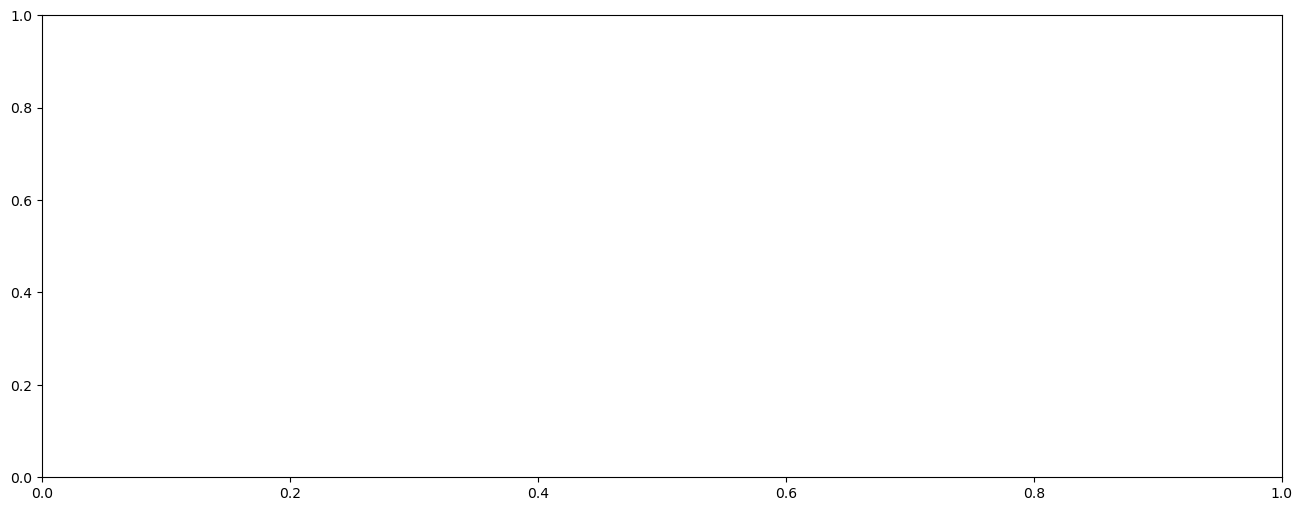

<Figure size 1600x600 with 0 Axes>

In [22]:
print("Введите порог и максимальное значение сигнала, для выбора заранее заданного варианта введите числа, количество которых не равно 2")
inpt = input().split();
if len(inpt) != 2:
    th = 500
    Max = 1000
else:
    th = int(inpt[0])
    Max = int(inpt[1])
    if Max <= th:
        Max += th
print("Th =", th, "\tMax =", Max)     
distortion = []
for i in range(len(data)):
    if abs(data[i]) <= th:
        distortion += data[i]
    else:
        distortion += (Max * np.sign(data[i]))

wavfile.write("num5.wav",sampleRate, np.array(distortion).astype(np.int16))
        
f = plt.figure()
f.set_figwidth(16)
#f.set_figheight(6)        
plt.plot(time, distortion, color="orange")
plt.show();

# Выводы